# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dados.csv')
df.columns

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
# fiz esse drop pois por algum motivo que eu desconheço apareceu uma coluna repetindo os index.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  int64  
 10  posse_de_veiculo_Y                      16650 non-null  in

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [6]:
y = df.mau
X = df.drop('mau', axis=1)

In [7]:
clf = clf.fit(X[['sexo_M']],y)

In [8]:
df.mau.value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

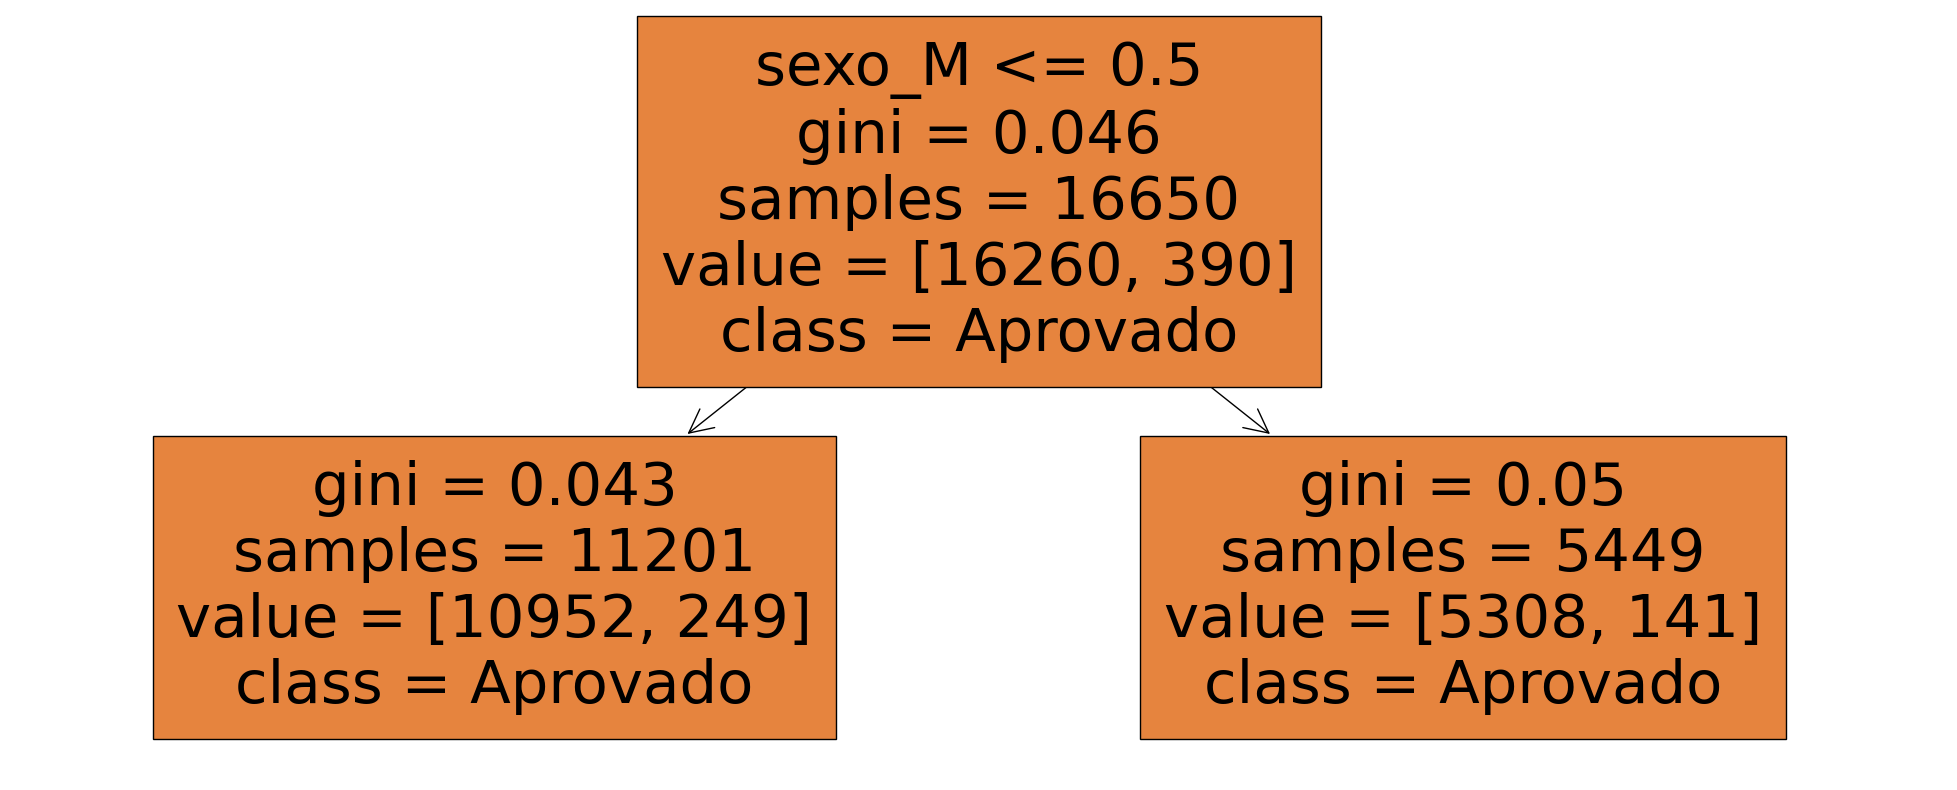

In [9]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=['sexo_M']);

In [10]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

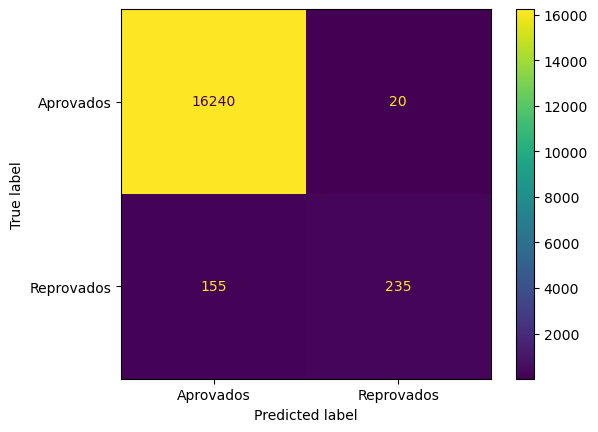

In [11]:
preditos = clf.predict(X)
cm = confusion_matrix(y, preditos, labels=clf.classes_)
MDC = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MDC.plot()

In [12]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9894894894894894

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)



In [14]:
y_predict = clf.predict(X_test)


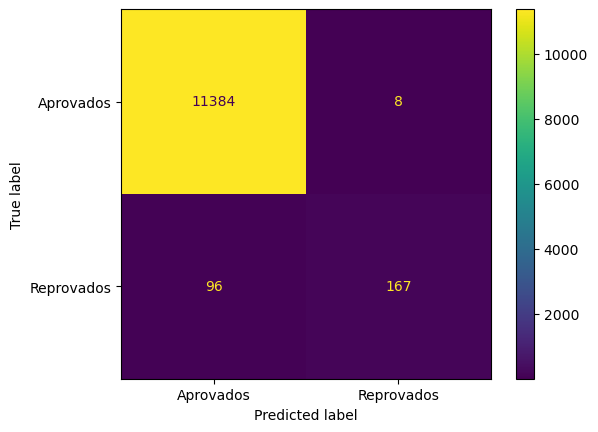

In [15]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MDC = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
MDC.plot()

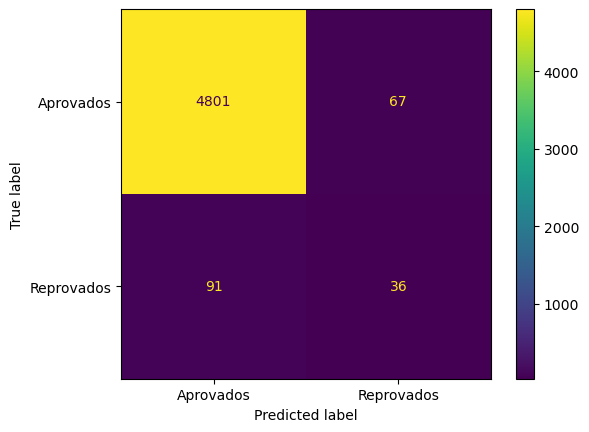

In [16]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MDC = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
MDC.plot()

In [17]:
accuracy_score(y_test, y_predict)

0.9683683683683684

In [18]:
accuracy_score(y_train, clf.predict(X_train))

0.991076791076791

In [19]:
clf = DecisionTreeClassifier(max_depth=10,
                            min_samples_leaf=5,
                            random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9727727727727727

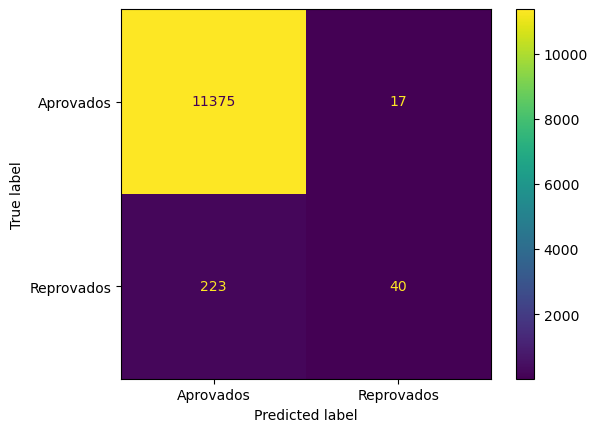

In [20]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MDC = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
MDC.plot()

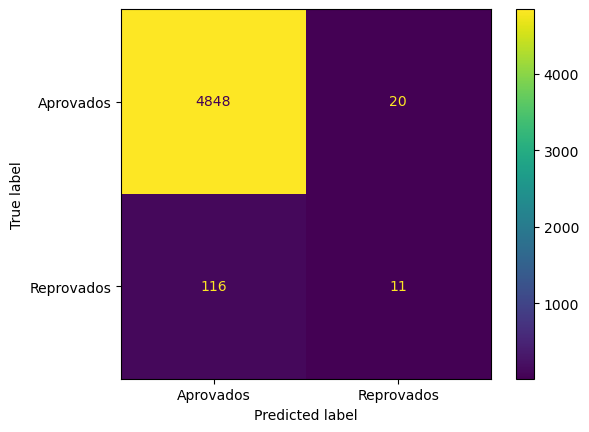

In [21]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MDC = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
MDC.plot()

In [22]:
accuracy_score(y_test, clf.predict(X_test))
# se eu entendi bem a pergunta e o resultado, houve uma pequena proporção classificada como "mau pagador".

0.9727727727727727

In [28]:
#respondendo a ultima questão, a acurácia ficaria perfeita caso fosse classificados todos os contratos como "bons". No caso seria uma acurácia de 100%.

TypeError: 'numpy.dtypes.BoolDType' object is not callable